## ML Model Data Pipeline
Created by Vincent Lao.

### Function of Pipeline:

Given a dataset, y variable column name, and a defined model (e.g. LinearRegression()), do the following:  
1. Split the data into training and testing data.
2. Train the model on the training set, and predict on the test set.
3. Calculate the MSE, and plot some diagnostics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

In [1]:
def preprocess_data(data, y_col, test_size=0.2, random_state=100, stnd_data = False):
    """
    This function takes a dataset and splits it up into training and testing data, 
    as well as features and response variable.
    
    Input: data,         a Pandas dataframe
           y_col,        a string that is the name of the response variable
           test_size,    a float between 0 and 1 indicating the fraction of the data to include in the test split
           random_state, an integer, used to define the random state
           stnd_data,    a boolean indicating if you would like to standardize your features.
           
    Output: X_train, 2D array of the training data feature matrix
           X_test,  1D array of the training data response variable
           y_train, 2D array of the testing data feature matrix
           y_test,  1D array of the testing data response variable
    """
    print('Splitting data...')
    X = data.loc[:, data.columns != y_col]
    y = data[y_col]
    
    if stnd_data:
        scaler = StandardScaler() # Initialize the StandardScaler
        scaler.fit(X)             # Fit the standard scaler for each feature
        X = scaler.transform(X)   # Standardize each feature

    X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                            test_size=test_size, \
                                                            random_state=random_state)
    return X_train, X_test, y_train, y_test



def run_model_pipeline(X_train, X_test, y_train, y_test, model, diagnostics = False):
    """
    This function takes in data that has been split by scikit-learn's test_train_split
    and a model that has been initialized, and fits the model and calculates the MSE on the training & testing data.
    
    Input: X_train, X_test, y_train, y_test, the output of preprocess_data()
           model, an initialized scikit-learn model, i.e. LinearRegression, Ridge(), Lasso(), DecisionTree()
           diagnostics, a boolean indicating if you would like to plot linear regression diagnostic plots
           
    Ouput: printed R^2 and MSE values of both the training and testing sets
           model, the fitted model
    """

    # fit model with scikit-learn
    print('Fitting Model...')
    model.fit(X_train, y_train)

    preds_train = model.predict(X_train)
    mse_train = mean_squared_error(preds_train, y_train.values)
    print('[Train MSE:', str(np.round(mse_train, 4)) + ']')
    
    r_2 = model.score(X_test, y_test)
    print('[Train R^2:', str(r_2) + ']')
    
    # evaluate model
    preds_test = model.predict(X_test)
    mse_test = mean_squared_error(preds_test, y_test.values)
    print('[Test MSE:', str(np.round(mse_test, 4)) + ']')
    
    r_2 = model.score(X_test, y_test)
    print('[Test R^2:', str(r_2) + ']')
    
    # plot any diagonostics that are in the 
    if diagnostics:
        summarize_diagnostics(preds_test, y_test)

    print('----FINISHED----')
    
    return model



def summarize_diagnostics(preds, y_test):
    
    df = pd.DataFrame({'preds' : preds, 'resids' : y_test - preds}).sort_values('preds')

    # plot residuals
    plt.title('Fitted Values vs. Residuals')
    plt.scatter(df['preds'], df['resids'], color='blue')
    plt.ylabel('Residual')
    plt.xlabel('Fitted Values')

    # save plot to file
#     plt.savefig('../../visualizations/diagnostic_plot.png')
#     plt.close()

Splitting data...
Fitting Model...
[MSE: 80493.3654]
[R^2: 0.41471900924150895]
----FINISHED----


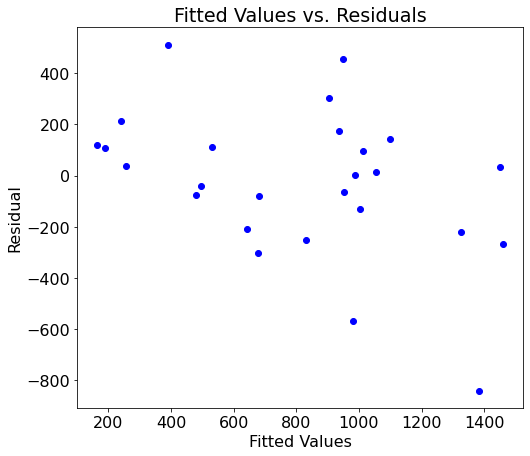

In [202]:
# model = LinearRegression()

# fittedmodel = run_model_pipeline(food2, 'totalco2', model, diagnostics=True)

In [ ]:
KFold()

In [197]:
def linreg_kfold_cv(ModelCV, X_train, X_test, y_train, y_test, alphas, n_splits = 5, random_state=100):
    """
    This function takes either RidgeCV or LassoCV, and performs cross validation on the input data.
    Be careful to standardize the input data beforehand!
    
    Input: ModelCV,      either RidgeCV or LassoCV (before initializing it).
           X_train,      X_test, y_train, y_test, output from preprocess_data()
           alphas,       a list or array of alpha values you would like to test
           n_splits,     number of folds you would like for your cv
           random_state, seed of the cross-validation for reproducibility
           
    Output: print statements of the optimal alpha value + test set MSE
            alpha_opt, the chosen optimal alpha value on the input data
    """
    
    kf = KFold(n_splits = n_splits, shuffle=True, random_state=random_state)
    cv = ModelCV(cv = kf, alphas = alphas)
    cv.fit(X_train, y_train)
    
    alpha_opt = cv.alpha_
    print("optimal alpha:", alpha_opt)
    
    y_pred_cv = cv.predict(X_test)
    
    cv_mse = mean_squared_error(y_test, y_pred_cv)
    print("Test MSE with cross-validated", re.findall(r'\w{5}CV', str(ModelCV))[0] + ":", cv_mse)
    
    r_2 = cv.score(X_test, y_test)
    print('[R^2:', str(r_2) + ']')
    
    return alpha_opt

optimal alpha: 20
Test MSE with cross-validated RidgeCV: 73976.5469840636
[R^2: 0.46210390775908505]


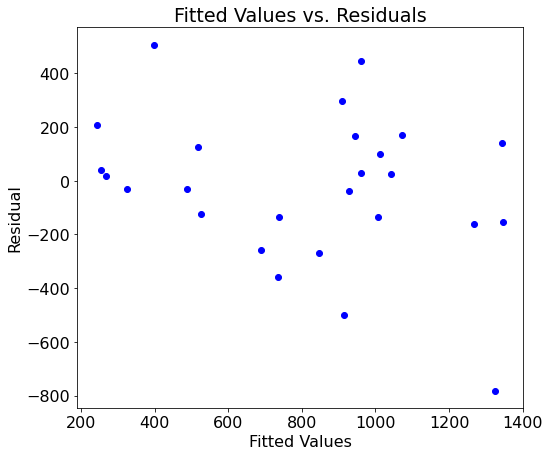

In [200]:
# linreg_kfold_cv(RidgeCV, X_train, X_test, y_train, y_test, alphas, random_state=100)

Splitting data...
Fitting Model...
[MSE: 80493.3654]
[R^2: 0.41471900924150895]
----FINISHED----


LinearRegression()

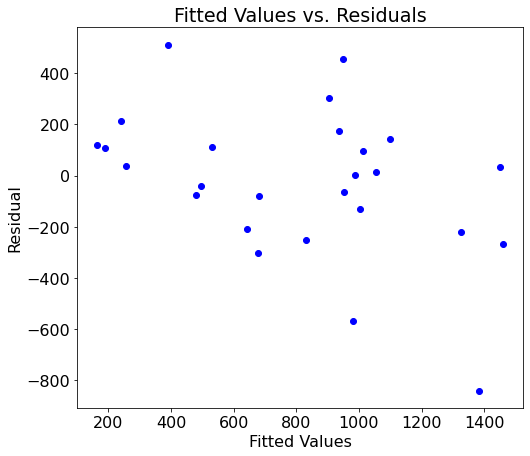

In [201]:
# run_model_pipeline(food2, 'totalco2', LinearRegression(), diagnostics=True)

---

### Recreating the lm() function from R in Python using statsmodels

In [ ]:
from matplotlib import rcParams
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import scipy.stats as stats

In [89]:
# code from here: https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a

def plot_residuals_vs_fitted(results):
    '''
    Given a fitted statsmodels.OLS model, graph the residuals vs. fitted data. Code taken from link above.
    '''
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    fig, ax = plt.subplots()
    ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Residuals vs. Fitted')
    ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax.annotate(i,xy=(fitted[i],residuals[i]))

In [90]:
def qqplot(results):
    '''
    Given a fitted statsmodels.OLS model, graph the normal Q-Q plot. Code taken from link above.
    '''
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax.set_title('Normal Q-Q')
    ax.set_ylabel('Standardized Residuals')
    ax.set_xlabel('Theoretical Quantiles')
    ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    plt.show()

In [91]:
def plot_leverage(results):
    '''
    Given a fitted statsmodels.OLS model, graph the residuals vs. leverage plot. Code taken from link above.
    '''
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Studentized Residuals')
    ax.set_xlabel('Leverage')
    ax.set_title('Residuals vs. Leverage')
    ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax.set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax.annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
    ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax.legend()
    plt.show()

In [98]:
# using statsmodels 

# X = sm.add_constant(food2.loc[:, food2.columns != 'totalco2']).drop(columns='soybeansupply_pct')
# y = food2['totalco2']

# X_train, X_test, y_train, y_test = train_test_split(X, y, \
#                                                         test_size=0.2, \
#                                                         random_state=100)

# model = sm.OLS(y_train, X_train)
# results = model.fit()